In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_covtype
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC

## Ejercicio 1
Imprime por pantalla tu nombre, apellido y email

In [2]:
# Resuelve en esta celda el ejercicio 1
nombre = "Angel"
apellido = "Roman Osma"
email = "romanosma@gmail.com"

print(f"Nombre: {nombre}")
print(f"Apellido: {apellido}")
print(f"Email: {email}")

Nombre: Angel
Apellido: Roman Osma
Email: romanosma@gmail.com


## Ejercicio 2

### Ejercicio 2.1
Muestra los primeros registros del siguiente conjunto de datos

In [3]:
# Cargar el dataset "titanic" de seaborn
df = sns.load_dataset("titanic")

# Resolver aqui el ejercicio 2.1
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### Ejercicio 2.2
Muestra una descripción general del conjunto de datos cargado en el ejercicio 2.1

In [4]:
# Resuelve aqui el ejercicio 2.2
print("Información general del DataFrame:")
df.info()
print("\nDescripción estadística del DataFrame:")
print(df.describe(include='all'))

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

Descripción estadística del DataFrame:
    

### Ejercicio 2.3
Elimina los datos de la columna "deck" y sustituye los datos nulos para la columno "age" con el valor medio. Luego muestra el dataframe:

In [5]:
# Resuelve aqui el ejercicio 2.3
# Eliminar la columna "deck"
df = df.drop("deck", axis=1)

# Sustituir datos nulos en "age" con la media
mean_age = df["age"].mean()
df["age"] = df["age"].fillna(mean_age)

# Mostrar el DataFrame modificado
print("DataFrame después de eliminar 'deck' e imputar 'age':")
print(df.head())
print("\nVerificación de nulos después de las operaciones:")
print(df.isnull().sum())

DataFrame después de eliminar 'deck' e imputar 'age':
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
1  woman       False    Cherbourg   yes  False  
2  woman       False  Southampton   yes   True  
3  woman       False  Southampton   yes  False  
4    man        True  Southampton    no   True  

Verificación de nulos después de las operaciones:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class   

#### Ejercicio 2.4
Crea un gráfico de tipo histograma que represente la distribución de las edades de los pasajeros. Usa **matplotlib** o **seaborn** como herramientas de visualización

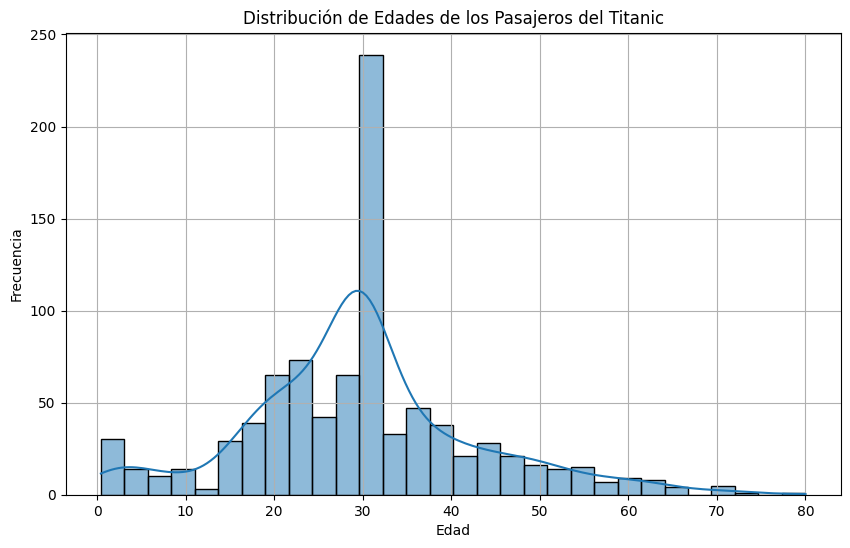

In [6]:
# Resuelve aqui el ejercicio 2.4
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Distribución de Edades de los Pasajeros del Titanic')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

#### Ejercicio 2.5
Crea un gráfico circular que represente la distribución por género de los pasajeros. Usa **matplotlib** o **seaborn** como herramientas de visualización

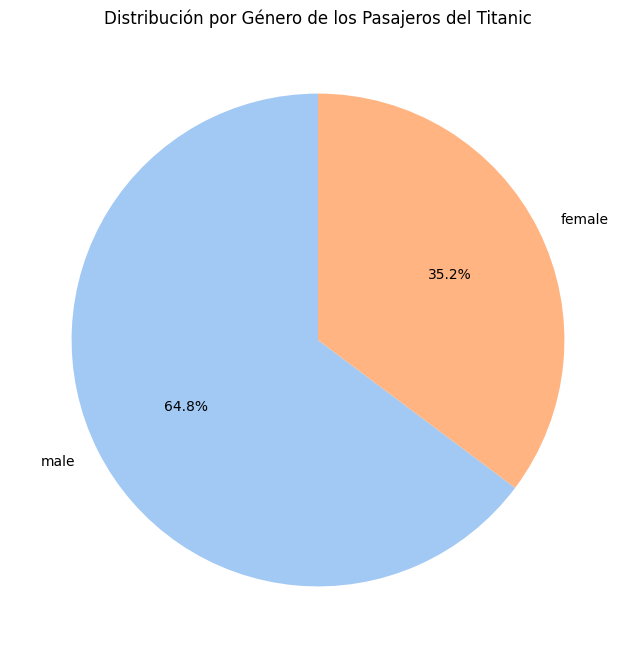

In [7]:
# Resuelve aqui el ejercicio 2.5
gender_counts = df['sex'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribución por Género de los Pasajeros del Titanic')
plt.show()

## Ejercicio 3

#### Ejercicio 3.1
Separa el dataset en dos variables, 'x' e 'y'.
 - La variable 'x' debe incluir las columnas 'depth', 'table', 'price', 'x', 'y' y 'z'.
 - La variable 'y' debe incluir la columna 'carat'.

In [8]:
# Carga el dataset "diamonds" de seaborn
diamantes = sns.load_dataset("diamonds")
diamantes.head()

# Resuelve aqui el ejercicio 3.1
feature_cols_d = ['depth', 'table', 'price', 'x', 'y', 'z']
target_col_d = 'carat'

x_diamantes = diamantes[feature_cols_d]
y_diamantes = diamantes[target_col_d]

print("Variables predictoras (x_diamantes) - Primeras 5 filas:")
print(x_diamantes.head())
print("\nVariable objetivo (y_diamantes) - Primeras 5 filas:")
print(y_diamantes.head())

Variables predictoras (x_diamantes) - Primeras 5 filas:
   depth  table  price     x     y     z
0   61.5   55.0    326  3.95  3.98  2.43
1   59.8   61.0    326  3.89  3.84  2.31
2   56.9   65.0    327  4.05  4.07  2.31
3   62.4   58.0    334  4.20  4.23  2.63
4   63.3   58.0    335  4.34  4.35  2.75

Variable objetivo (y_diamantes) - Primeras 5 filas:
0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64


#### Ejercicio 3.2
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test

In [9]:
# Resuelve aqui el ejercicio 3.2
x_train_d, x_test_d, y_train_d, y_test_d = train_test_split(
    x_diamantes, y_diamantes, test_size=0.4, random_state=42
)

print(f"Tamaño de x_train_d: {x_train_d.shape}")
print(f"Tamaño de x_test_d: {x_test_d.shape}")
print(f"Tamaño de y_train_d: {y_train_d.shape}")
print(f"Tamaño de y_test_d: {y_test_d.shape}")

Tamaño de x_train_d: (32364, 6)
Tamaño de x_test_d: (21576, 6)
Tamaño de y_train_d: (32364,)
Tamaño de y_test_d: (21576,)


#### Ejercicio 3.3
Crea un modelo de regresión lineal y entrenalo con los conjuntos de datos separados en el ejercicio anterior. La variable objetivo corresponde a la columna 'carat'

In [10]:
# Resuelve aqui el ejercicio 3.3
model_lr = LinearRegression()
model_lr.fit(x_train_d, y_train_d)

print("Modelo de Regresión Lineal entrenado.")
print(f"Coeficientes: {model_lr.coef_}")
print(f"Intercepto: {model_lr.intercept_}")

Modelo de Regresión Lineal entrenado.
Coeficientes: [1.83553628e-02 4.37885137e-03 3.24803939e-05 3.00417037e-01
 8.60095293e-03 7.48562691e-04]
Intercepto: -2.4886874780397314


#### Ejercicio 3.4
Utiliza el modelo entrenado en el apartado anterior para predecir los valores de la columna 'carat'

In [11]:
# Resuelve aqui el ejercicio 3.4 (originalmente mal numerado como 3.3)
y_pred_d = model_lr.predict(x_test_d)

print("Predicciones para 'carat' en el conjunto de test (primeras 5 predicciones):")
print(y_pred_d[:5])

Predicciones para 'carat' en el conjunto de test (primeras 5 predicciones):
[0.14346117 0.61704432 0.40518998 0.44160874 1.4217783 ]


### Ejercicio 4

#### Ejercicio 4.1
Muestra un resumen estadístico de los datos numéricos del dataset provisto

In [12]:
data_bc = load_breast_cancer()
X_bc = pd.DataFrame(data_bc.data, columns=data_bc.feature_names)
y_bc = pd.Series(data_bc.target)

# ALTERNATIVA CON OTRO DATASET 
# Cargar el dataset "titanic" de seaborn
# df = sns.load_dataset("titanic")

# Resuelve aqui el ejercicio 4.1
print("Resumen estadístico de las características del dataset Breast Cancer (X_bc):")
print(X_bc.describe())

Resumen estadístico de las características del dataset Breast Cancer (X_bc):
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min          

#### Ejercicio 4.2
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test

In [13]:
# Resuelve aqui el ejercicio 4.2
x_train_bc, x_test_bc, y_train_bc, y_test_bc = train_test_split(
    X_bc, y_bc, test_size=0.4, random_state=42, stratify=y_bc 
)

print(f"Tamaño de x_train_bc: {x_train_bc.shape}")
print(f"Tamaño de x_test_bc: {x_test_bc.shape}")
print(f"Tamaño de y_train_bc: {y_train_bc.shape}")
print(f"Tamaño de y_test_bc: {y_test_bc.shape}")

Tamaño de x_train_bc: (341, 30)
Tamaño de x_test_bc: (228, 30)
Tamaño de y_train_bc: (341,)
Tamaño de y_test_bc: (228,)


#### Ejercicio 4.3
Crea un modelo de regresión logística y entrenalo con los conjuntos de datos separados en el ejercicio anterior. 

In [14]:
# Resuelve aqui el ejercicio 4.3
model_logreg = LogisticRegression(solver='lbfgs', max_iter=3000, random_state=42) # Aumentado max_iter por si acaso
model_logreg.fit(x_train_bc, y_train_bc)

print("Modelo de Regresión Logística entrenado.")

Modelo de Regresión Logística entrenado.


#### Ejercicio 4.4
Utiliza el modelo entrenado en el apartado anterior para predecir los valores de la variable objetivo. 

In [15]:
# Resuelve aqui el ejercicio 4.4
y_pred_bc = model_logreg.predict(x_test_bc)

print("Predicciones de la variable objetivo en el conjunto de test (primeras 5 predicciones):")
print(y_pred_bc[:5])

accuracy_bc = accuracy_score(y_test_bc, y_pred_bc)
print(f"\nPrecisión del modelo de Regresión Logística: {accuracy_bc:.4f}")

Predicciones de la variable objetivo en el conjunto de test (primeras 5 predicciones):
[1 1 1 1 1]

Precisión del modelo de Regresión Logística: 0.9561


### Ejercicio 5

#### Ejercicio 5.1
Muestra los primeros registros del siguiente conjunto de datos

In [16]:
df_penguins = sns.load_dataset("penguins")
# Resuelve aqui el ejercicio 5.1
print("Primeros registros del dataset Penguins:")
print(df_penguins.head())

Primeros registros del dataset Penguins:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


#### Ejercicio 5.2
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test. La variable objetivo corresponde a la columna "species"

In [17]:
# Resuelve aquí el ejericio 5.2
df_penguins_clean = df_penguins.dropna()

X_p = df_penguins_clean.drop("species", axis=1)
y_p = df_penguins_clean["species"]

X_p = pd.get_dummies(X_p, columns=['island', 'sex'], drop_first=True)

x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(
    X_p, y_p, test_size=0.4, random_state=42, stratify=y_p
)

print(f"Tamaño de x_train_p: {x_train_p.shape}")
print(f"Tamaño de x_test_p: {x_test_p.shape}")
print(f"Tamaño de y_train_p: {y_train_p.shape}")
print(f"Tamaño de y_test_p: {y_test_p.shape}")
print("\nPrimeras filas de X_p (características procesadas):")
print(X_p.head())

Tamaño de x_train_p: (199, 7)
Tamaño de x_test_p: (134, 7)
Tamaño de y_train_p: (199,)
Tamaño de y_test_p: (134,)

Primeras filas de X_p (características procesadas):
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0            39.1           18.7              181.0       3750.0   
1            39.5           17.4              186.0       3800.0   
2            40.3           18.0              195.0       3250.0   
4            36.7           19.3              193.0       3450.0   
5            39.3           20.6              190.0       3650.0   

   island_Dream  island_Torgersen  sex_Male  
0         False              True      True  
1         False              True     False  
2         False              True     False  
4         False              True     False  
5         False              True      True  


#### Ejercicio 5.3
Elige un modelo de clasificación entre los siguientes: 
 - Decision tree (Árbol de decisión)
 - Random forest
 - SVM (Support Vector Machine)
 
Entrenalo con los conjuntos de datos separados en el ejercicio anterior. 

In [18]:
# Resuelve aquí el ejericio 5.3
# Elegimos Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(x_train_p, y_train_p)

print("Modelo Random Forest entrenado.")

Modelo Random Forest entrenado.


#### Ejercicio 5.4
Utiliza el modelo entrenado en el apartado anterior para predecir los valores de la variable objetivo. 

Predicciones de 'species' en el conjunto de test (primeras 5 predicciones):
['Chinstrap' 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo']

Precisión del modelo Random Forest: 0.9925


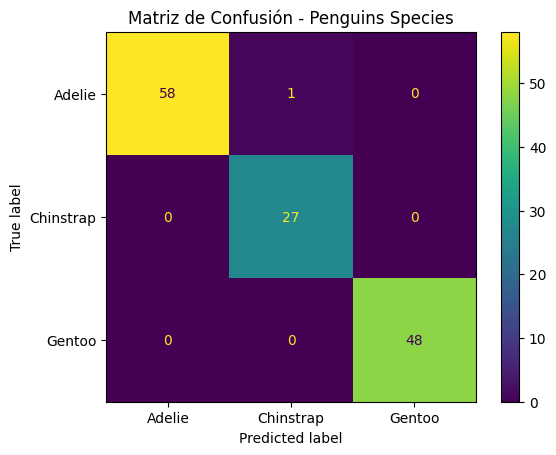

In [19]:
# Resuelve aquí el ejericio 5.4
y_pred_p = model_rf.predict(x_test_p)

print("Predicciones de 'species' en el conjunto de test (primeras 5 predicciones):")
print(y_pred_p[:5])

accuracy_p = accuracy_score(y_test_p, y_pred_p)
print(f"\nPrecisión del modelo Random Forest: {accuracy_p:.4f}")

cm_p = confusion_matrix(y_test_p, y_pred_p, labels=model_rf.classes_)
disp_p = ConfusionMatrixDisplay(confusion_matrix=cm_p, display_labels=model_rf.classes_)
disp_p.plot()
plt.title("Matriz de Confusión - Penguins Species")
plt.show()

### Ejercicio 6

#### Ejercicio 6.1
Muestra un resumen estadístico de los datos numéricos del dataset provisto

In [20]:
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
df_abalone_temp = pd.read_csv(url, header=None)
df_abalone_temp.columns = [
   "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]
df_abalone = df_abalone_temp.drop("Sex", axis=1) # df_abalone es el que no tiene 'Sex'

# Resuelve aqui el ejercicio 6.1
print("Resumen estadístico de los datos numéricos del dataset Abalone (sin 'Sex'):")
print(df_abalone.describe())

Resumen estadístico de los datos numéricos del dataset Abalone (sin 'Sex'):
            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.00

#### Ejercicio 6.2
Separa el conjunto de datos en variables 'x' e 'y', donde la 'y' corresponde a la variable objetivo 'Sex'.

In [21]:
# Resuelve aqui el ejercicio 6.2
# Usamos df_abalone_temp que contiene la columna 'Sex'
X_abalone = df_abalone_temp.drop("Sex", axis=1)
y_abalone = df_abalone_temp["Sex"]

print("Variables predictoras (X_abalone) - Primeras 5 filas:")
print(X_abalone.head())
print("\nVariable objetivo (y_abalone - 'Sex') - Primeras 5 filas:")
print(y_abalone.head())

Variables predictoras (X_abalone) - Primeras 5 filas:
   Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  

Variable objetivo (y_abalone - 'Sex') - Primeras 5 filas:
0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object


#### Ejercicio 6.3
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test. 

In [22]:
# Resuelve aquí el ejercicio 6.3
x_train_ab, x_test_ab, y_train_ab, y_test_ab = train_test_split(
    X_abalone, y_abalone, test_size=0.4, random_state=42, stratify=y_abalone
)

print(f"Tamaño de x_train_ab: {x_train_ab.shape}")
print(f"Tamaño de x_test_ab: {x_test_ab.shape}")
print(f"Tamaño de y_train_ab: {y_train_ab.shape}")
print(f"Tamaño de y_test_ab: {y_test_ab.shape}")

Tamaño de x_train_ab: (2506, 8)
Tamaño de x_test_ab: (1671, 8)
Tamaño de y_train_ab: (2506,)
Tamaño de y_test_ab: (1671,)


#### Ejercicio 6.4
Crea un modelo de regresión logística y entrenalo con los conjuntos de datos separados en el ejercicio anterior. Utiliza el valor 3 para el parámetro 'n_neighbors'

In [23]:
# Resuelve aquí el ejercicio 6.4
# El enunciado dice "regresión logística" pero pide 'n_neighbors=3', que es de KNN.
# Se asumirá que se pide un KNN.
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train_ab, y_train_ab)

print("Modelo K-Nearest Neighbors (KNN) entrenado con n_neighbors=3.")

Modelo K-Nearest Neighbors (KNN) entrenado con n_neighbors=3.


#### Ejercicio 6.5
Muestra la matriz de confusión resultante para la salida del ejercicio anterior

Predicciones de 'Sex' en el conjunto de test (primeras 5 predicciones):
['M' 'I' 'I' 'I' 'M']

Matriz de Confusión - Abalone Sex Prediction (KNN):


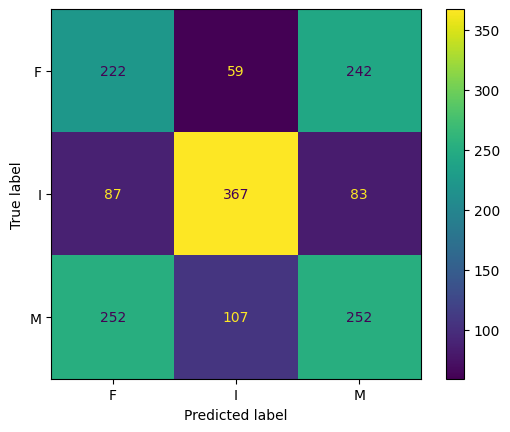

In [24]:
# Resuelve aquí el ejercicio 6.5
y_pred_ab = model_knn.predict(x_test_ab)

print("Predicciones de 'Sex' en el conjunto de test (primeras 5 predicciones):")
print(y_pred_ab[:5])

cm_ab = confusion_matrix(y_test_ab, y_pred_ab, labels=model_knn.classes_)
disp_ab = ConfusionMatrixDisplay(confusion_matrix=cm_ab, display_labels=model_knn.classes_)

print("\nMatriz de Confusión - Abalone Sex Prediction (KNN):")
disp_ab.plot()
plt.show()